# **Field Analysis for 1st Cell Face**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Increase plot resolution
plt.rcParams["figure.dpi"] = 160
# Set paths and create output directory
run = "../run/"
output = "output"
!mkdir -p $output

## Load data for wall correction

In [2]:
yp50_path = [run + 'turbulentFlatPlate_onlyWall_50iter/yplus_50/50yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, 51)]
yp50_data = [pd.read_csv(yp50_path[j], delim_whitespace=False) for j in range(50)]
yp50_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,4.254940,2.539552,0.000059,0.000035,1.168167e+06,8.432228e-14,0.000021,274543.784303,845.133905,68.870054,0.071517,69.079545,0.104069,40.400359,40.095943,0.182489,1.030353
1,0.001458,4.237718,2.724906,0.000059,0.000038,1.158179e+06,1.768720e-13,0.000024,273302.596456,1535.182972,68.558695,0.075141,68.942110,0.111174,41.126922,40.807773,0.182489,1.025597
2,0.002433,4.221751,2.548649,0.000059,0.000035,1.148914e+06,3.536707e-13,0.000021,272141.565371,2175.173162,68.267451,0.070630,68.811956,0.105936,41.473536,41.174208,0.182489,1.021149
3,0.003410,4.207013,3.399155,0.000058,0.000047,1.140357e+06,7.082550e-13,0.000033,271061.053139,2754.044872,67.996408,0.064679,68.686470,0.097861,41.597856,41.324350,0.182489,1.017009
4,0.004390,4.193646,3.039230,0.000058,0.000042,1.132592e+06,1.374325e-12,0.000028,270073.428443,3272.922589,67.748664,0.058687,68.569114,0.089333,41.576642,41.329024,0.182489,1.013224


In [3]:
yp100_path = [run + 'turbulentFlatPlate_onlyWall_50iter/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, 51)]
yp100_data = [pd.read_csv(yp100_path[j], delim_whitespace=False) for j in range(50)]
yp100_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,7.475900,2.343506,0.000104,0.000033,989620.287787,4.222298e-14,0.000019,132374.742959,185.144174,69.134426,0.050428,69.229039,0.070383,38.140016,37.710172,0.383691,1.034391
1,0.001458,7.463869,2.734219,0.000104,0.000038,986440.275184,5.849085e-14,0.000024,132162.057763,308.269410,69.023344,0.056005,69.182717,0.078822,38.763898,38.287594,0.383691,1.032694
2,0.002433,7.452552,2.902671,0.000103,0.000040,983449.031220,7.955037e-14,0.000026,131961.371060,427.720977,68.918533,0.055266,69.140662,0.078905,39.099877,38.630931,0.383691,1.031093
3,0.003410,7.441616,2.675596,0.000103,0.000037,980558.234130,1.071762e-13,0.000023,131766.842650,540.053348,68.816941,0.052300,69.098028,0.075580,39.252018,38.809262,0.383691,1.029542
4,0.004390,7.431362,2.595295,0.000103,0.000036,977847.702838,1.418529e-13,0.000022,131583.923090,642.976148,68.721411,0.048589,69.056473,0.070889,39.279143,38.868746,0.383691,1.028082


## y+ = 50 for wall correction

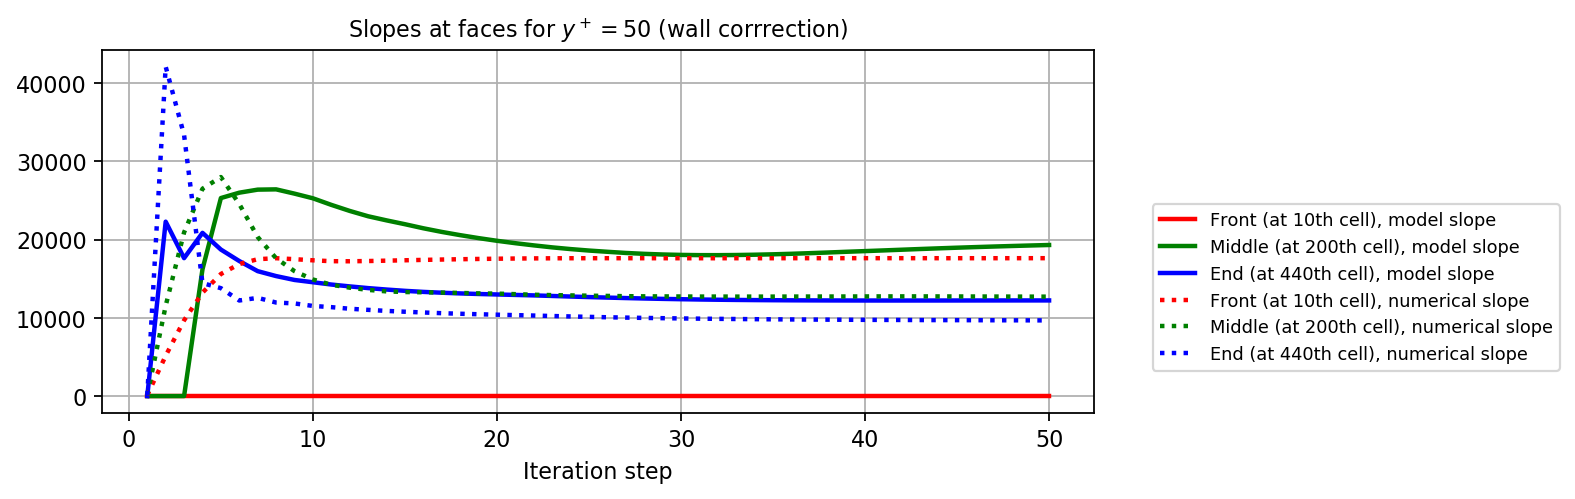

In [4]:
style = ["-", "--", ":", "-."]
lw = 2.0

fig, ax = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax.set_xlabel("Iteration step")
plt.title(r"Slopes at faces for $y^+ = 50$ (wall corrrection)", fontsize = 10)
ax.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell), model slope")
ax.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell), model slope")
ax.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell), model slope")
ax.plot([i+1 for i in range(50)], [yp50_data[j]['magGradU_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = "Front (at 10th cell), numerical slope")
ax.plot([i+1 for i in range(50)], [yp50_data[j]['magGradU_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = "Middle (at 200th cell), numerical slope")
ax.plot([i+1 for i in range(50)], [yp50_data[j]['magGradU_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

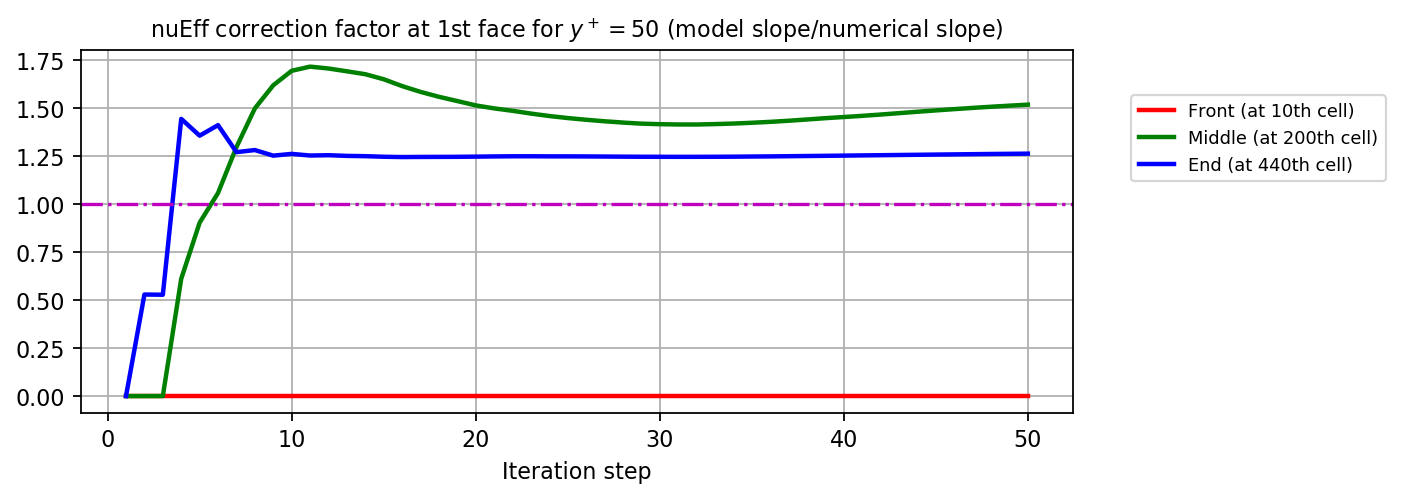

In [5]:
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax2.set_xlabel("Iteration step")
plt.title(r"nuEff correction factor at 1st face for $y^+ = 50$ (model slope/numerical slope)", fontsize = 10)
ax2.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][9]/yp50_data[j]['magGradU_face'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax2.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][199]/yp50_data[j]['magGradU_face'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax2.plot([i+1 for i in range(50)], [yp50_data[j]['face_slope'][439]/yp50_data[j]['magGradU_face'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
ax2.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.9))

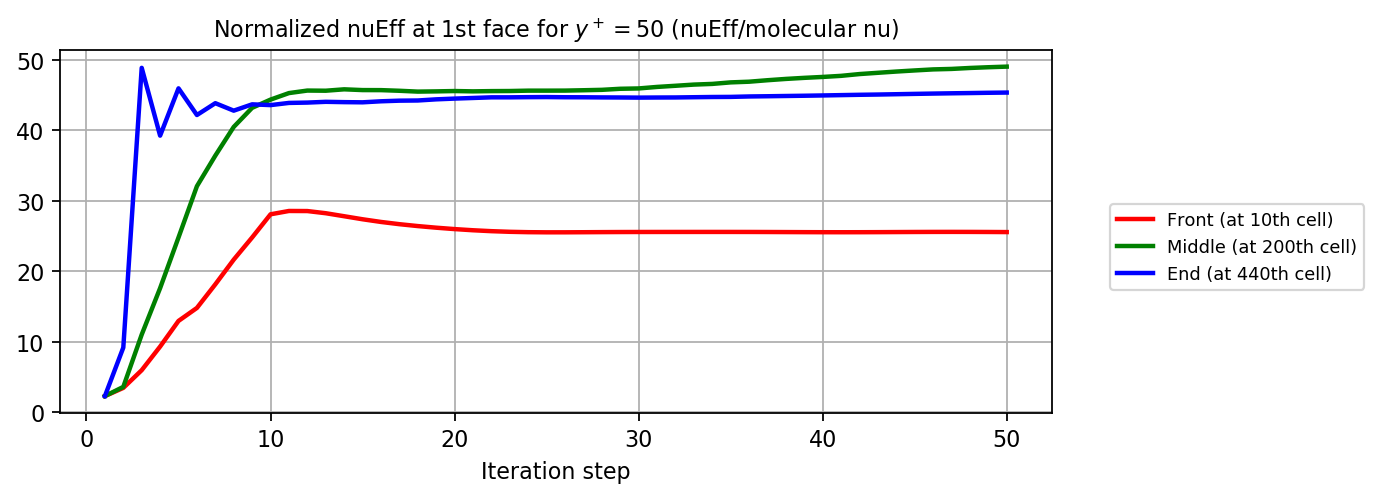

In [6]:
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax3.set_xlabel("Iteration step")
plt.title(r"Normalized nuEff at 1st face for $y^+ = 50$ (nuEff/molecular nu)", fontsize = 10)
ax3.plot([i+1 for i in range(50)], [yp50_data[j]['nuEff_face_norm'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax3.plot([i+1 for i in range(50)], [yp50_data[j]['nuEff_face_norm'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax3.plot([i+1 for i in range(50)], [yp50_data[j]['nuEff_face_norm'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

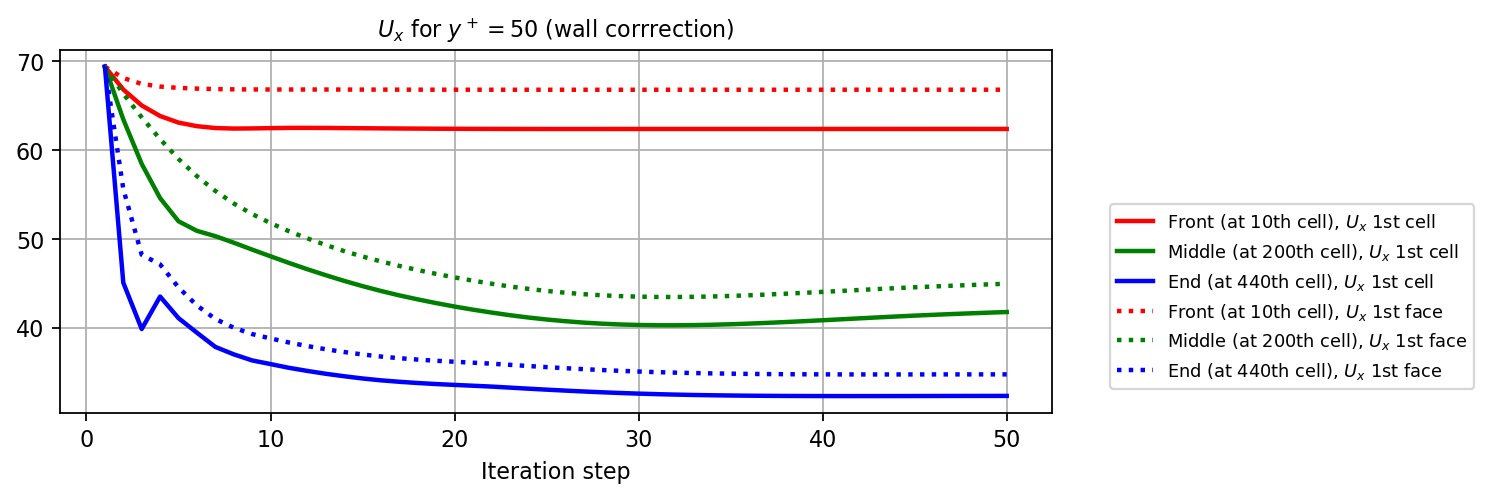

In [7]:
fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax4.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 50$ (wall corrrection)", fontsize = 10)
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_cell'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_cell'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_cell'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st cell")
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st face")
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax4.plot([i+1 for i in range(50)], [yp50_data[j]['Ux_1st_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

## y+ = 100 for wall correction

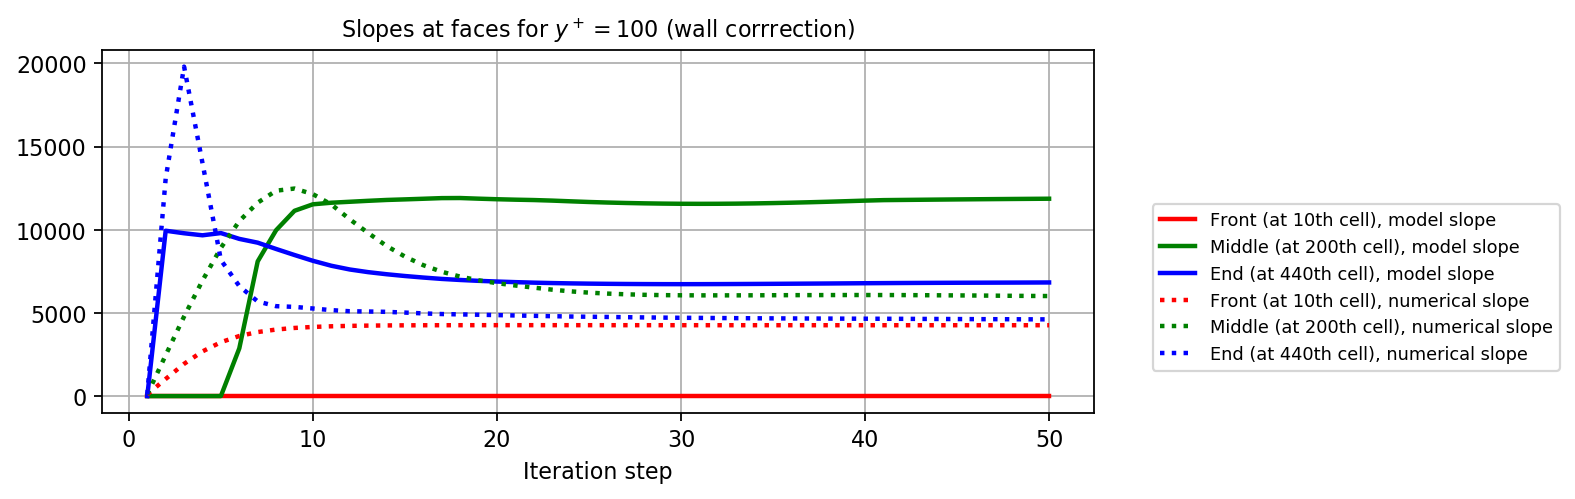

In [8]:
fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax5.set_xlabel("Iteration step")
plt.title(r"Slopes at faces for $y^+ = 100$ (wall corrrection)", fontsize = 10)
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell), model slope")
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell), model slope")
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell), model slope")
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['magGradU_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = "Front (at 10th cell), numerical slope")
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['magGradU_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = "Middle (at 200th cell), numerical slope")
ax5.plot([i+1 for i in range(50)], [yp100_data[j]['magGradU_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

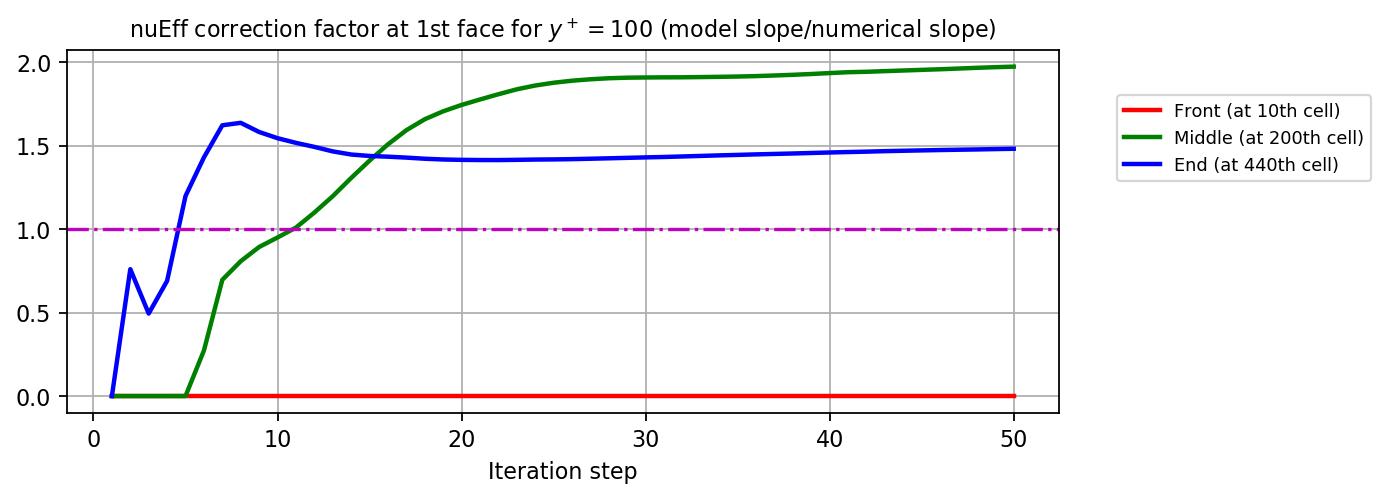

In [9]:
fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax6.set_xlabel("Iteration step")
plt.title(r"nuEff correction factor at 1st face for $y^+ = 100$ (model slope/numerical slope)", fontsize = 10)
ax6.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][9]/yp100_data[j]['magGradU_face'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax6.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][199]/yp100_data[j]['magGradU_face'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax6.plot([i+1 for i in range(50)], [yp100_data[j]['face_slope'][439]/yp100_data[j]['magGradU_face'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
ax6.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.9))

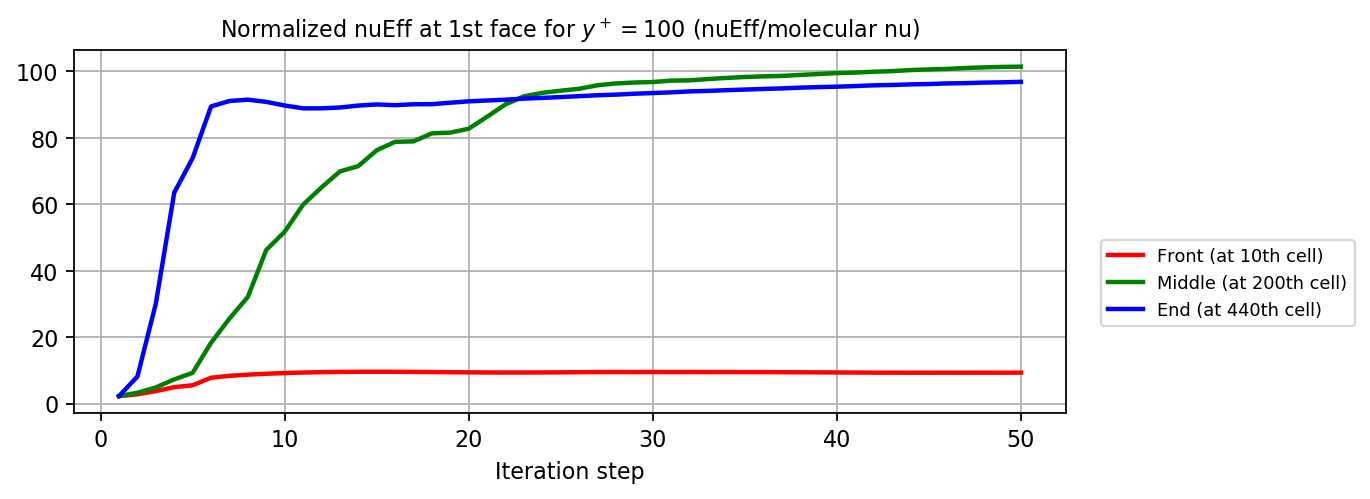

In [10]:
fig7, ax7 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax7.set_xlabel("Iteration step")
plt.title(r"Normalized nuEff at 1st face for $y^+ = 100$ (nuEff/molecular nu)", fontsize = 10)
ax7.plot([i+1 for i in range(50)], [yp100_data[j]['nuEff_face_norm'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax7.plot([i+1 for i in range(50)], [yp100_data[j]['nuEff_face_norm'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax7.plot([i+1 for i in range(50)], [yp100_data[j]['nuEff_face_norm'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.5))

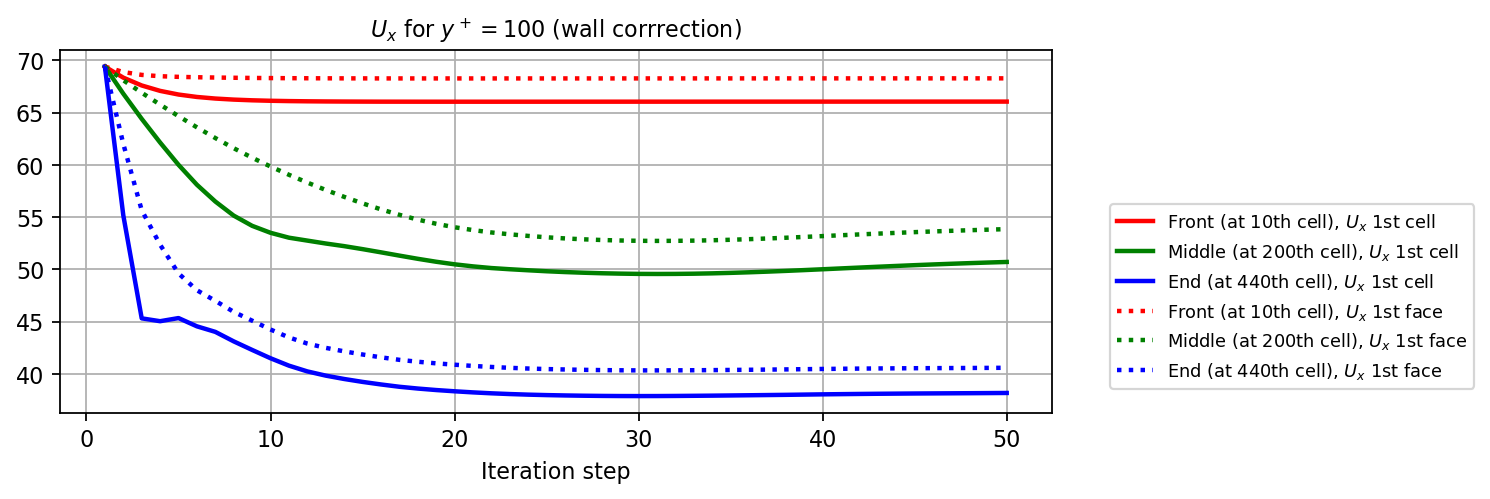

In [11]:
fig8, ax8 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax8.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 100$ (wall corrrection)", fontsize = 10)
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_cell'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_cell'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_cell'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st cell")
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st face")
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax8.plot([i+1 for i in range(50)], [yp100_data[j]['Ux_1st_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

## Load data for wall and 1st face correction

In [12]:
yp50_face_path = [run + 'turbulentFlatPlate_1stface_50iter/yplus_50/50yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, 51)]
yp50_face_data = [pd.read_csv(yp50_face_path[j], delim_whitespace=False) for j in range(50)]
yp50_face_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,4.254885,2.531162e-16,0.000059,3.513253e-21,1.168135e+06,8.452156e-14,-0.000014,274539.829197,848.017486,68.869062,0.071765,69.079275,0.104375,40.024702,39.719734,0.182489,1.030338
1,0.001458,4.237596,3.140327e-16,0.000059,4.358774e-21,1.158108e+06,1.778106e-13,-0.000014,273293.728397,1542.902126,68.556470,0.075502,68.941825,0.111590,40.752066,40.431912,0.182489,1.025563
2,0.002433,4.221537,4.155495e-16,0.000059,5.767827e-21,1.148790e+06,3.569708e-13,-0.000014,272126.003782,2189.375078,68.263547,0.071085,68.811618,0.106449,41.099768,40.799011,0.182489,1.021089
3,0.003410,4.206693,8.811183e-16,0.000058,1.222992e-20,1.140171e+06,7.195541e-13,-0.000014,271037.472916,2776.009868,67.990492,0.065207,68.686068,0.098451,41.225114,40.949836,0.182489,1.016918
4,0.004390,4.193206,1.292427e-15,0.000058,1.793888e-20,1.132337e+06,1.404736e-12,-0.000014,270040.820457,3303.603318,67.740484,0.059268,68.568633,0.089978,41.204756,40.955103,0.182489,1.013099


In [13]:
yp100_face_path = [run + 'turbulentFlatPlate_1stface_50iter/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, 51)]
yp100_face_data = [pd.read_csv(yp100_face_path[j], delim_whitespace=False) for j in range(50)]
yp100_face_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,7.475885,5.341913e-16,0.000104,7.414576e-21,989616.356753,4.223996e-14,-0.000014,132374.480467,185.307373,69.134289,0.050480,69.228987,0.070444,38.100383,37.670268,0.383691,1.034389
1,0.001458,7.463842,5.185309e-16,0.000104,7.197209e-21,986433.115872,5.853385e-14,-0.000014,132161.578161,308.649792,69.023094,0.056077,69.182666,0.078903,38.724523,38.247791,0.383691,1.032690
2,0.002433,7.452508,5.396568e-16,0.000103,7.490437e-21,983437.416981,7.964555e-14,-0.000014,131960.590656,428.392925,68.918126,0.055357,69.140606,0.079004,39.060829,38.591303,0.383691,1.031087
3,0.003410,7.441552,5.309074e-16,0.000103,7.368994e-21,980541.315199,1.073636e-13,-0.000014,131765.702449,541.076933,68.816345,0.052405,69.097968,0.075693,39.213300,38.769831,0.383691,1.029532
4,0.004390,7.431275,5.726676e-16,0.000103,7.948626e-21,977824.811483,1.421896e-13,-0.000014,131582.376115,644.397369,68.720603,0.048705,69.056408,0.071014,39.240724,38.829510,0.383691,1.028070


## y+ = 50 for wall and 1st face correction

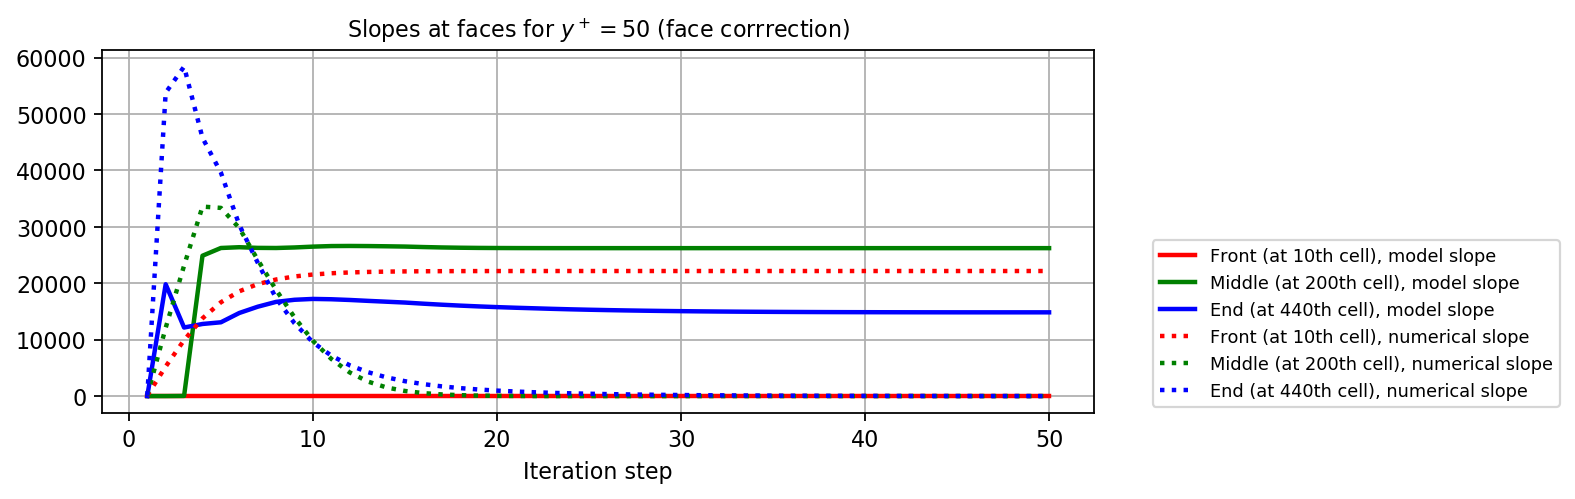

In [14]:
fig_face, ax_face = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face.set_xlabel("Iteration step")
plt.title(r"Slopes at faces for $y^+ = 50$ (face corrrection)", fontsize = 10)
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell), model slope")
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell), model slope")
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell), model slope")
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['magGradU_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = "Front (at 10th cell), numerical slope")
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['magGradU_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = "Middle (at 200th cell), numerical slope")
ax_face.plot([i+1 for i in range(50)], [yp50_face_data[j]['magGradU_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))

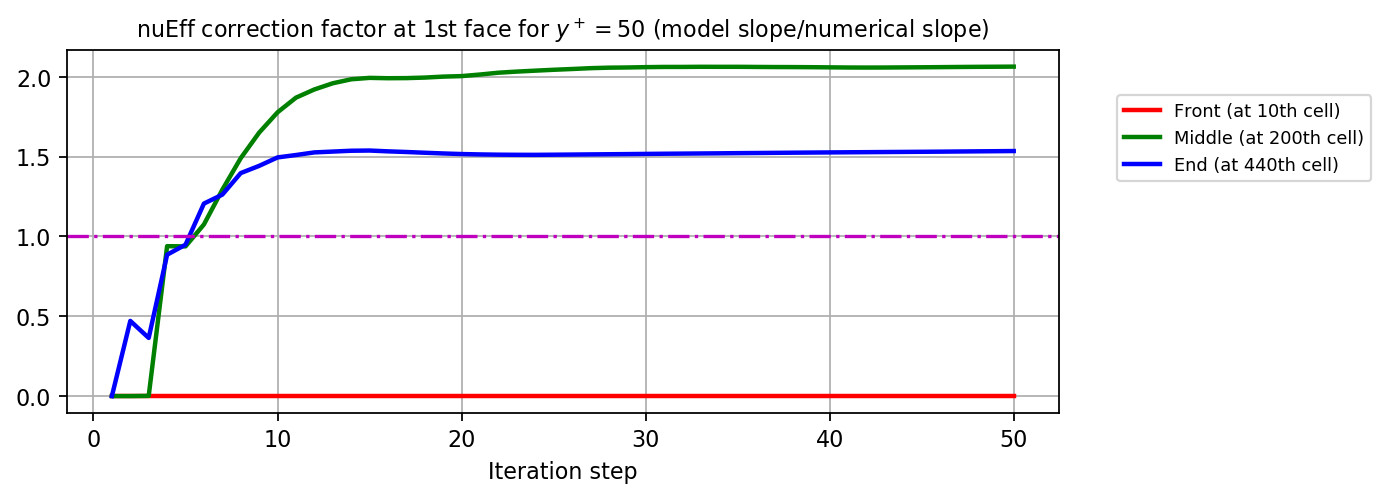

In [15]:
fig_face2, ax_face2 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face2.set_xlabel("Iteration step")
plt.title(r"nuEff correction factor at 1st face for $y^+ = 50$ (model slope/numerical slope)", fontsize = 10)
ax_face2.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][9]/yp50_data[j]['magGradU_face'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax_face2.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][199]/yp50_data[j]['magGradU_face'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax_face2.plot([i+1 for i in range(50)], [yp50_face_data[j]['face_slope'][439]/yp50_data[j]['magGradU_face'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
ax_face2.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.9))

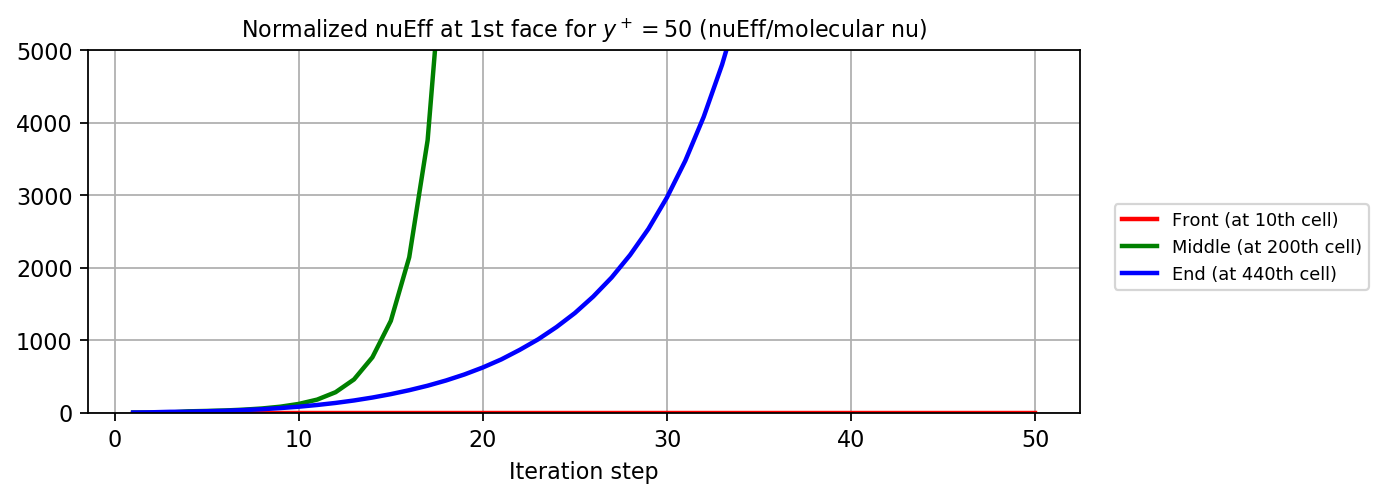

In [16]:
fig_face3, ax_face3 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face3.set_xlabel("Iteration step")
plt.ylim([0, 5000])
plt.title(r"Normalized nuEff at 1st face for $y^+ = 50$ (nuEff/molecular nu)", fontsize = 10)
ax_face3.plot([i+1 for i in range(50)], [yp50_face_data[j]['nuEff_face_norm'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax_face3.plot([i+1 for i in range(50)], [yp50_face_data[j]['nuEff_face_norm'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax_face3.plot([i+1 for i in range(50)], [yp50_face_data[j]['nuEff_face_norm'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

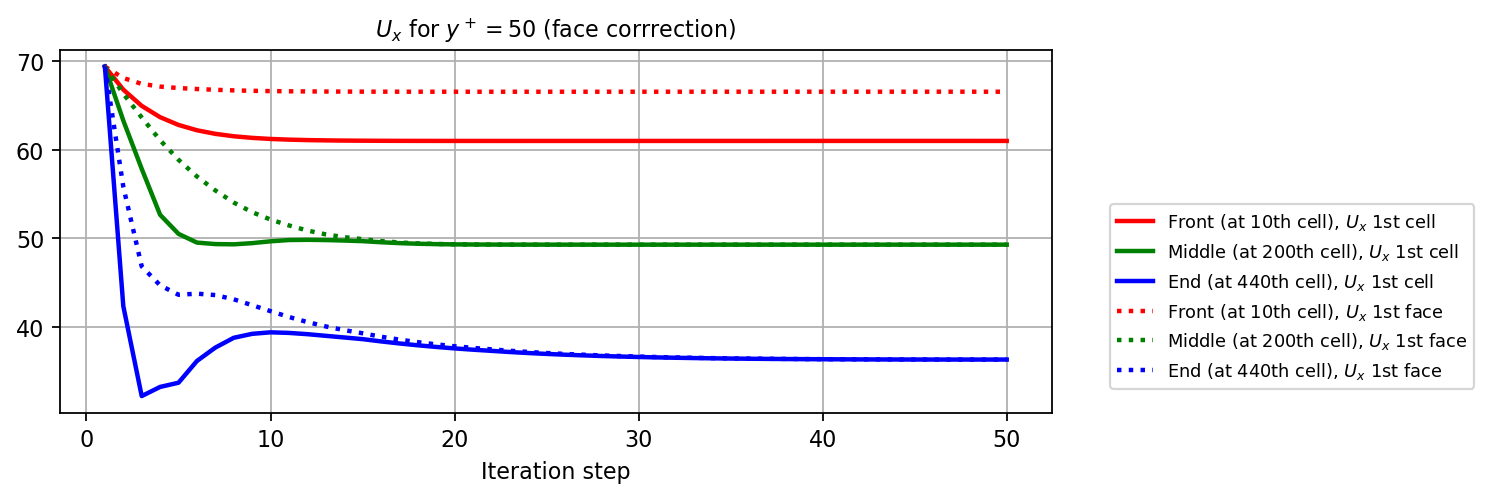

In [17]:
fig_face4, ax_face4 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face4.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 50$ (face corrrection)", fontsize = 10)
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_cell'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_cell'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_cell'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st face")
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax_face4.plot([i+1 for i in range(50)], [yp50_face_data[j]['Ux_1st_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

## y+ = 100 for wall and 1st face correction

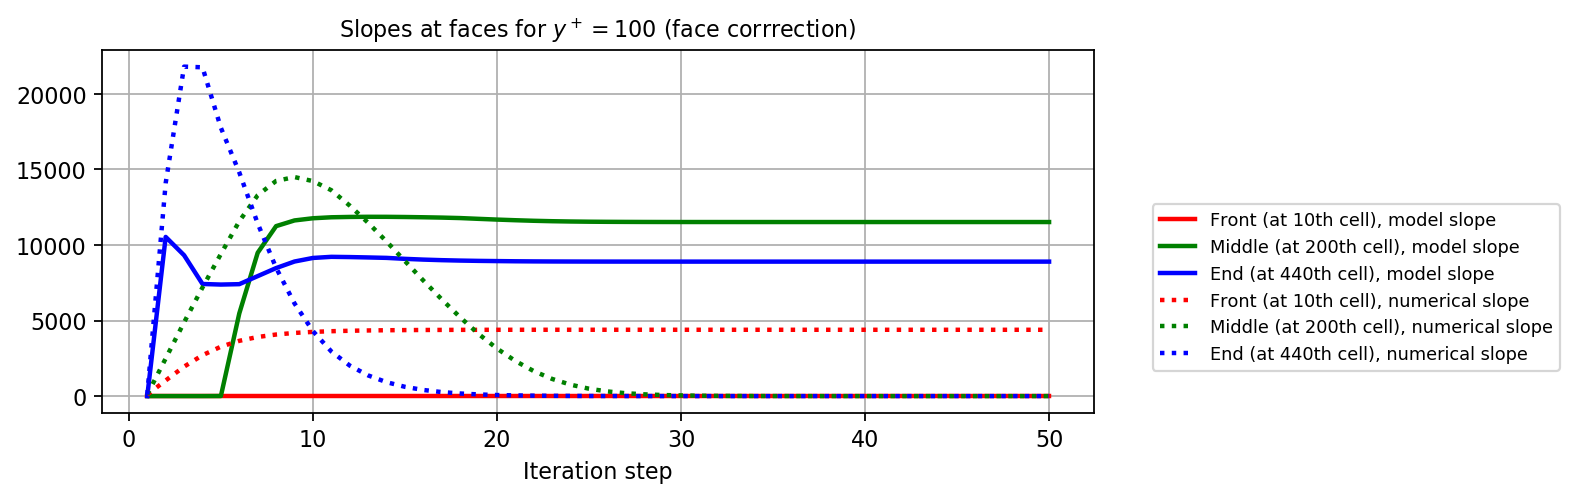

In [18]:
fig_face5, ax_face5 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face5.set_xlabel("Iteration step")
plt.title(r"Slopes at faces for $y^+ = 100$ (face corrrection)", fontsize = 10)
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell), model slope")
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell), model slope")
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell), model slope")
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['magGradU_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = "Front (at 10th cell), numerical slope")
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['magGradU_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = "Middle (at 200th cell), numerical slope")
ax_face5.plot([i+1 for i in range(50)], [yp100_face_data[j]['magGradU_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

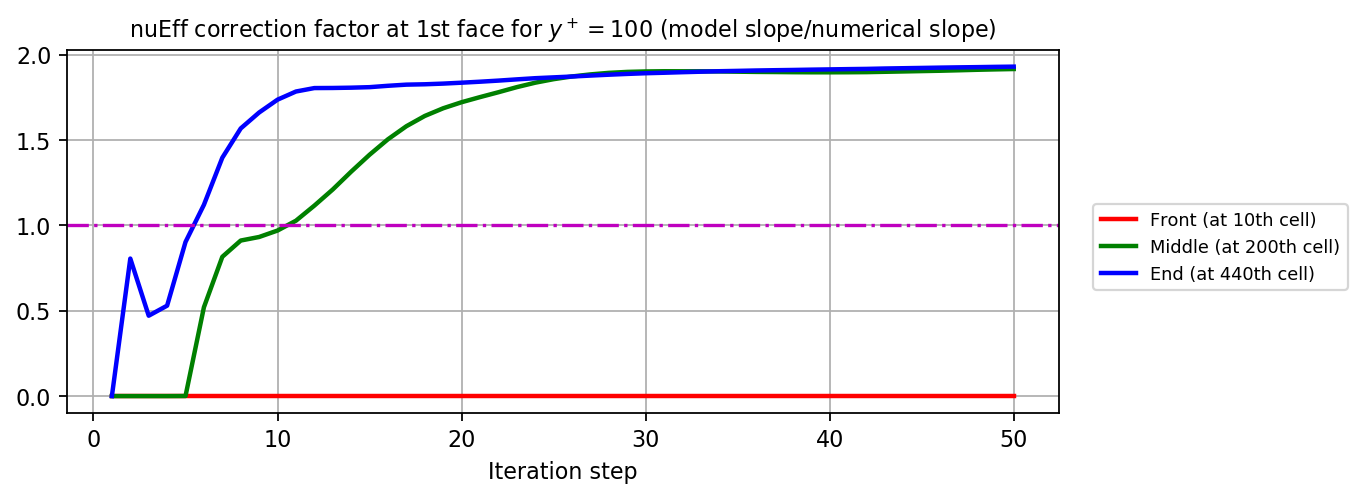

In [19]:
fig_face6, ax_face6 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face6.set_xlabel("Iteration step")
plt.title(r"nuEff correction factor at 1st face for $y^+ = 100$ (model slope/numerical slope)", fontsize = 10)
ax_face6.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][9]/yp100_data[j]['magGradU_face'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax_face6.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][199]/yp100_data[j]['magGradU_face'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax_face6.plot([i+1 for i in range(50)], [yp100_face_data[j]['face_slope'][439]/yp100_data[j]['magGradU_face'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
ax_face6.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

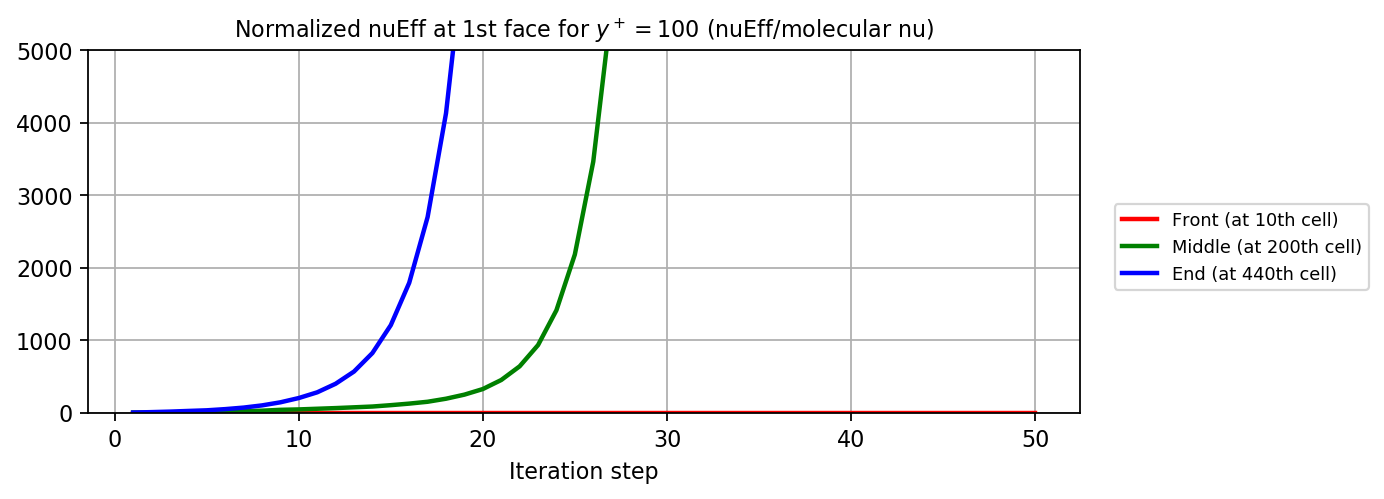

In [20]:
fig_face7, ax_face7 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face7.set_xlabel("Iteration step")
plt.ylim([0, 5000])
plt.title(r"Normalized nuEff at 1st face for $y^+ = 100$ (nuEff/molecular nu)", fontsize = 10)
ax_face7.plot([i+1 for i in range(50)], [yp100_face_data[j]['nuEff_face_norm'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell)")
ax_face7.plot([i+1 for i in range(50)], [yp100_face_data[j]['nuEff_face_norm'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell)")
ax_face7.plot([i+1 for i in range(50)], [yp100_face_data[j]['nuEff_face_norm'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

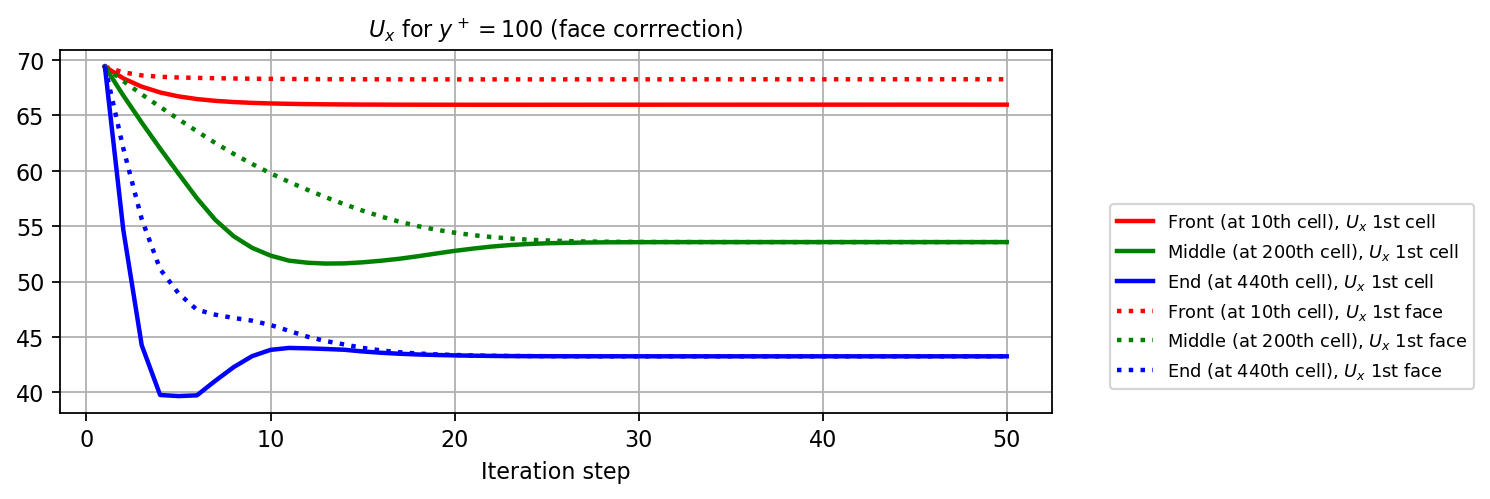

In [21]:
fig_face8, ax_face8 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face8.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 100$ (face corrrection)", fontsize = 10)
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_cell'][9] for j in range(50)], ls = style[0], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_cell'][199] for j in range(50)], ls = style[0], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_cell'][439] for j in range(50)], ls = style[0], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_face'][9] for j in range(50)], ls = style[2], c = "r", lw = lw, label = r"Front (at 10th cell), $U_x$ 1st face")
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_face'][199] for j in range(50)], ls = style[2], c = "g", lw = lw, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax_face8.plot([i+1 for i in range(50)], [yp100_face_data[j]['Ux_1st_face'][439] for j in range(50)], ls = style[2], c = "b", lw = lw, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))